In [1]:
# import all necessary things
%matplotlib nbagg

import qcodes as qc
import qcodes.instrument.parameter as parameter
import qcodes.instrument_drivers.AlazarTech.ATS9360 as ATSdriver
import qcodes.instrument_drivers.AlazarTech.ATS_acquisition_controllers as ats_contr

qc.halt_bg()
qc.set_mp_method('spawn')  # force Windows behavior on mac

# this makes a widget in the corner of the window to show and control
# subprocesses and any output they would print to the terminal
qc.show_subprocess_widget()

<IPython.core.display.Javascript object>

No loop running


a:\qcodes\qcodes\process\helpers.py:27: UserWarning: Multiprocessing is in beta, use at own risk
  warnings.warn("Multiprocessing is in beta, use at own risk", UserWarning)


In [2]:
# Command to list all alazar boards connected to the system
ATSdriver.AlazarTech_ATS.find_boards()

[{'bits_per_sample': 12,
  'board_id': 1,
  'board_kind': 'ATS9360',
  'max_samples': 4294967294,
  'system_id': 1}]

In [3]:
# Create the ATS9870 instrument on the new server "alazar_server"
ats_inst = ATSdriver.AlazarTech_ATS9360(name='Alazar1', server_name="alazar_server")
# Print all information about this Alazar card
ats_inst.get_idn()

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


{'CPLD_version': '25.16',
 'SDK_version': '5.9.25',
 'asopc_type': '1712554848',
 'driver_version': '5.9.25',
 'firmware': None,
 'latest_cal_date': '13-11-15',
 'memory_size': '4294967294',
 'model': 'ATS9360',
 'pcie_link_speed': '0.5GB/s',
 'pcie_link_width': '8',
 'serial': '970344',
 'vendor': 'AlazarTech'}

In [4]:
import qcodes.instrument_drivers.AlazarTech.basic_controller as basic_contr

basic_acquisition_controller = basic_contr.Basic_Acquisition_Controller(name='basic_acquisition_controller', 
                                                                      alazar_name='Alazar1', 
                                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [5]:
# Configure all settings in the Alazar card
ats_inst.config(#clock_source='EXTERNAL_CLOCK_10MHz_REF',
                #sample_rate='10MHZ_REF_500MSPS',
                #clock_edge='CLOCK_EDGE_RISING',
                #decimation=1,
                coupling=['DC','DC'],
                channel_range=[.4,.4],
                #impedance=[50,50],
                #trigger_operation='TRIG_ENGINE_OP_J',
                #trigger_engine1='TRIG_ENGINE_J',
                #trigger_source1='EXTERNAL',
                #trigger_slope1='TRIG_SLOPE_POSITIVE',
                trigger_level1=140,
                #trigger_engine2='TRIG_ENGINE_K',
                #trigger_source2='DISABLE',
                #trigger_slope2='TRIG_SLOPE_POSITIVE',
                #trigger_level2=128,
                external_trigger_coupling='DC',
                external_trigger_range='ETR_2V5',
                #trigger_delay=0,
                #timeout_ticks=0,
                #aux_io_mode='AUX_IN_AUXILIARY',
                #aux_io_param='NONE'
)

In [6]:
ats_inst.aux_io_param()

'NONE'

In [7]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
basic_acquisition_controller.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=1024,
                 records_per_buffer=1,
                 buffers_per_acquisition=1,
                 #channel_selection='AB',
                 #transfer_offset=0,
                 #external_startcapture='ENABLED',
                 #enable_record_headers='DISABLED',
                 #alloc_buffers='DISABLED',
                 #fifo_only_streaming='DISABLED',
                 #interleave_samples='DISABLED',
                 #get_processed_data='DISABLED',
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [8]:
data1 = basic_acquisition_controller.acquisition()

In [9]:
basic_acquisition_controller.acquisition.setpoints

(((0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135,
   136,
   137,
   138

<IPython.core.display.Javascript object>


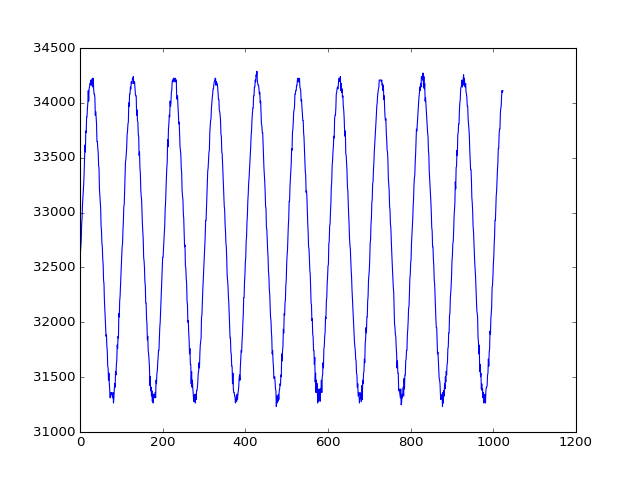

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data1[0])
plt.show()

In [10]:
# Finally show that this instrument also works within a loop
dummy = parameter.ManualParameter(name="dummy")
data2 = qc.Loop(dummy[0:5:1]).each(basic_acquisition_controller.acquisition).run(name='AlazarTest')
qc.QtPlot(data2.basic_acquisition_controller_A )

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-11-08/09-35-19_AlazarTest'
   <Type>   | <array_id>                     | <array.name> | <array.shape>
   Setpoint | dummy_set                      | dummy        | (5,)
   Measured | sample_num                     | sample_num   | (5, 1024)
   Measured | basic_acquisition_controller_A | A            | (5, 1024)
   Measured | basic_acquisition_controller_B | B            | (5, 1024)
started at 2016-11-08 09:35:21


In [19]:
import qcodes.instrument_drivers.AlazarTech.Samp_controller as sample_controller

samp_cont = sample_controller.HD_Samples_Controller(name='samples_controller', 
                                                      alazar_name='Alazar1', 
                                                      demod_freq = 5e6,
                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [48]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
samp_cont.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=1024,
                 records_per_buffer=7,
                 buffers_per_acquisition=1,
                 #channel_selection='AB',
                 #transfer_offset=0,
                 #external_startcapture='ENABLED',
                 #enable_record_headers='DISABLED',
                 #alloc_buffers='DISABLED',
                 #fifo_only_streaming='DISABLED',
                 #interleave_samples='DISABLED',
                 #get_processed_data='DISABLED',
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [49]:
data3 = samp_cont.acquisition()

<IPython.core.display.Javascript object>


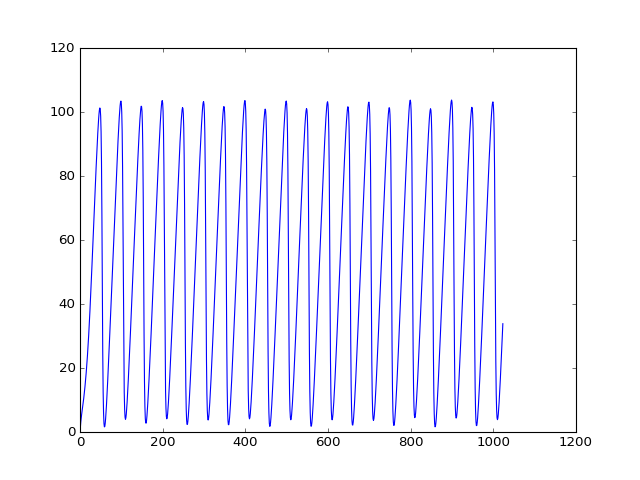

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data3[1])
plt.show()

In [14]:
dummy = parameter.ManualParameter(name="dummy")
data4 = qc.Loop(dummy[0:5:1]).each(
    samp_cont.acquisition).run(name='AlazarTest')

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-11-08/10-10-07_AlazarTest'
   <Type>   | <array_id>                   | <array.name> | <array.shape>
   Setpoint | dummy_set                    | dummy        | (5,)
   Measured | sample_num                   | sample_num   | (5, 1024)
   Measured | samples_controller_magnitude | magnitude    | (5, 1024)
   Measured | samples_controller_phase     | phase        | (5, 1024)
started at 2016-11-08 10:10:09


In [23]:
qc.QtPlot(data4.samples_controller_magnitude)

NameError: name 'data4' is not defined

In [24]:
import qcodes.instrument_drivers.AlazarTech.Single_controller as single_controller

sing_contr = single_controller.HD_Controller(name='single_controller', 
                                                      alazar_name='Alazar1', 
                                                      demod_freq = 5e6,
                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [25]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
sing_contr.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=2560,
                 records_per_buffer=1,
                 buffers_per_acquisition=1,
                 #channel_selection='AB',
                 #transfer_offset=0,
                 #external_startcapture='ENABLED',
                 #enable_record_headers='DISABLED',
                 #alloc_buffers='DISABLED',
                 #fifo_only_streaming='DISABLED',
                 #interleave_samples='DISABLED',
                 #get_processed_data='DISABLED',
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [26]:
data5 = sing_contr.acquisition()

In [27]:
data5

(3326.8644117553804, 54.301233235582359)

In [30]:
dummy = parameter.ManualParameter(name="dummy")
data6 = qc.Loop(dummy[0:5:1]).each(
    sing_contr.acquisition).run(name='AlazarTest')

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-11-08/10-27-15_AlazarTest'
   <Type>   | <array_id>                  | <array.name> | <array.shape>
   Setpoint | dummy_set                   | dummy        | (5,)
   Measured | single_controller_magnitude | magnitude    | (5,)
   Measured | single_controller_phase     | phase        | (5,)
started at 2016-11-08 10:27:17


In [13]:
qc.QtPlot(data6.single_controller_phase)

In [11]:
import qcodes.instrument_drivers.AlazarTech.Rec_controller as record_controller

rec_contr = record_controller.HD_Records_Controller(name='rec_controller', 
                                                      alazar_name='Alazar1', 
                                                      demod_freq = 5e6,
                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [12]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
rec_contr.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=1024,
                 records_per_buffer=20,
                 buffers_per_acquisition=1,
                 #channel_selection='AB',
                 #transfer_offset=0,
                 #external_startcapture='ENABLED',
                 #enable_record_headers='DISABLED',
                 #alloc_buffers='DISABLED',
                 #fifo_only_streaming='DISABLED',
                 #interleave_samples='DISABLED',
                 #get_processed_data='DISABLED',
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [13]:
data7 = rec_contr.acquisition()

In [14]:
data7

(array([ 3289.96320022,  3286.41234804,  3307.51961298,  3258.31653189,
         3293.95959593,  3291.98748708,  3260.12595817,  3303.707061  ,
         3262.98369435,  3297.69539837,  3301.61275188,  3272.2064834 ,
         3309.53487782,  3264.07853243,  3297.85260115,  3285.39823933,
         3272.54744985,  3304.02929544,  3273.01252546,  3289.82606187]),
 array([  59.2785189 ,  -35.71021399,   23.98720238,  101.76356054,
           7.88187056, -123.96879121,  -64.55449409,   13.57780392,
         104.73958041,    7.80840739, -123.26288987,  -57.18388729,
          23.95505572,  104.72063281,    8.14861144, -109.83457381,
         -42.96898046,   24.012719  ,   83.99967619,   23.67250356]))

<IPython.core.display.Javascript object>


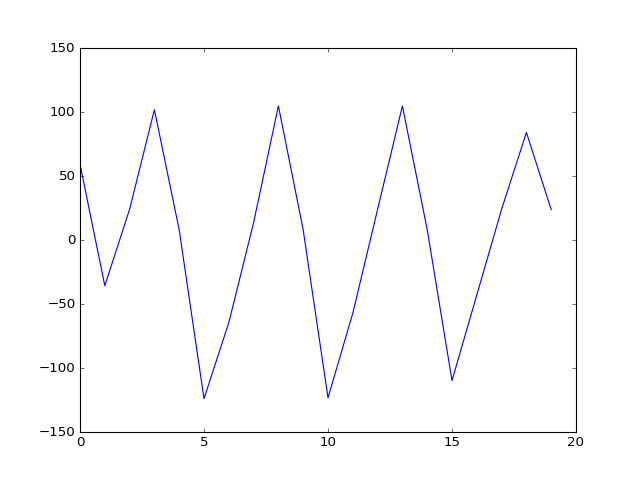

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data7[1])
plt.show()

In [16]:
dummy = parameter.ManualParameter(name="dummy")
data8 = qc.Loop(dummy[0:5:1]).each(
    rec_contr.acquisition).run(name='AlazarTest')

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-11-08/11-29-47_AlazarTest'
   <Type>   | <array_id>               | <array.name> | <array.shape>
   Setpoint | dummy_set                | dummy        | (5,)
   Measured | record_num               | record_num   | (5, 20)
   Measured | rec_controller_magnitude | magnitude    | (5, 20)
   Measured | rec_controller_phase     | phase        | (5, 20)
started at 2016-11-08 11:29:49


In [17]:
qc.QtPlot(data8.rec_controller_magnitude)

In [9]:
import qcodes.instrument_drivers.AlazarTech.RecSamp_controller as recsamp_controller

recsamp_contr = recsamp_controller.HD_RecSamp_Controller(name='recsamp_controller', 
                                                      alazar_name='Alazar1', 
                                                      demod_freq = 5e6,
                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [10]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
recsamp_contr.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=1024,
                 records_per_buffer=5,
                 buffers_per_acquisition=1,
                 #channel_selection='AB',
                 #transfer_offset=0,
                 #external_startcapture='ENABLED',
                 #enable_record_headers='DISABLED',
                 #alloc_buffers='DISABLED',
                 #fifo_only_streaming='DISABLED',
                 #interleave_samples='DISABLED',
                 #get_processed_data='DISABLED',
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [11]:
data9 = recsamp_contr.acquisition()

In [15]:
import numpy as np
np.shape(data9)

(2, 1024, 5)

<IPython.core.display.Javascript object>


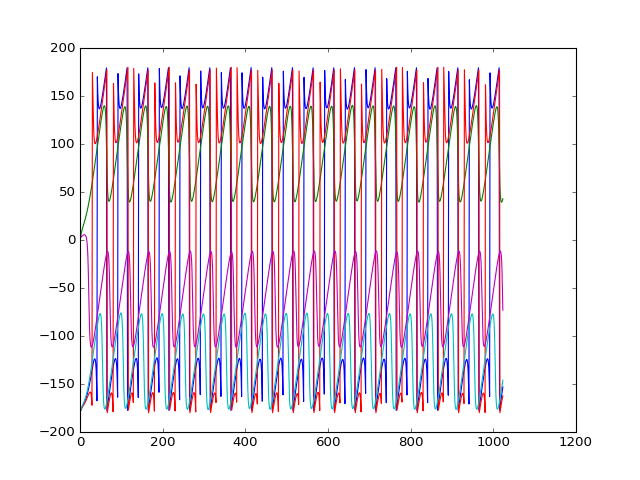

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data9[1])
plt.show()

In [14]:
dummy = parameter.ManualParameter(name="dummy")
data10 = qc.Loop(dummy[0:5:1]).each(
    recsamp_contr.acquisition).run(name='AlazarTest')

ValueError: nth setpoint array should have shape matching the first n dimensions of shape.

In [17]:
((np.arange(3), np.arange(2)), (np.arange(3), np.arange(2)))

((array([0, 1, 2]), array([0, 1])), (array([0, 1, 2]), array([0, 1])))